<div id="container" style="position:relative;">
<div style="float:left"><h1>  Intro to Scikit-Learn </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>


This unit is focused on various supervised and unsupervised machine learning techniques. We'll primarily be working with `scikit-learn`, a widely-used machine learning package in Python which is now becoming industry standard. 

`scikit-learn` contains a plethora of machine learning tools, from data preprocessing, statistical models including linear and logistic regression, to advanced machine learning models, and more. 

In this lecture we'll dive into the `scikit-learn` interface, building a strong foundation with its fundamentals before progressing into more sophisticated applications in machine learning throughout the unit.

First, let's import the packages we need:

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Note: We will never import all of `scikit-learn`, rather we'll import only the elements we'll need.

For a thorough list of what is available in `scikit-learn` take a look at the API reference in the official documentation here: https://scikit-learn.org/stable/modules/classes.html

### Creating Models

In the first part of the lecture, we'll walk through each of the steps to go from a data set to a complete model that we could deploy. The general process we will follow is:
1. Load the data
2. Fit the model
3. Make predictions and evaluate the model

### Loading the Data

Before we can begin fitting a model, we need data on which to fit it. This is also referred to as _training_ a model. For now, we're going to apply *supervised machine learning*, which is suitable for when we can divide our data into independent variables (usually denoted by $X$) and a dependent variable (denoted by $y$). 

(Later we will see how to perform *unsupervised machine learning*, which is used when our data has no dependent variable, or when we don't know what the dependent variable should be.) 

In a machine learning context: 
* Dependent variable = target = $y$
* Independent variables = features = $X$


#### Data Sources 

**1. Synthetic Data**

Many of the examples we've created use *synthetic data* — data that was specifically created for illustrative purposes:

In [172]:
# Two normal distributions (the one at -1 has label 1, the one at 1 has label 0)
X = pd.DataFrame(np.array(np.concatenate((np.random.randn(500) + (-1),np.random.randn(500) + (+1)), axis = 0)))
y = pd.DataFrame(np.full((1000),0))
y.loc[:500] = 1

**2. Comma Separated Value (CSV) files**

Another source of data we use is CSV files. We've used these before, but as a refresher, each row in the file corresponds to a data point (or observation) and each column refers to a variable. 

We can load CSV files with Pandas as below (get the file [here](https://drive.google.com/file/d/1B8of0WSx7vkW66PlC0g0DcJXZjI2Fkgi/view?usp=sharing)):

In [173]:
loans = pd.read_csv('data/loans.csv',index_col=0)
loans.head(10)

,Credit Score,Loan Request Amount,Approval
0,548,56,0
1,625,168,0
2,899,237,1
3,608,84,0
4,783,34,1
5,735,213,0
6,472,213,0
7,661,150,0
8,645,46,1
9,821,247,1


Here the dependent variable (or target) is _Approval_ while the independent variables (or features) are the other two columns. With the data loaded as is, we would have to split the columns manually in order to pull out our $X$ and $y$:

In [174]:
# Pretty easy to split data with Pandas!
X = loans[['Credit Score','Loan Request Amount']] # independent variables or features
y = loans['Approval'] # dependent variable or target

**3. `scikit-learn` Datasets**

The final source of data we'll consider for now are the data sets included `scikit-learn`. The package has several great data sets to explore and model. For a complete list see: https://scikit-learn.org/stable/datasets.html

Let's load in the California Housing dataset. This data contains various features of a home and with the average home price as the target variable. To load the data, we can use the following: 

In [175]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

print(type(california))

<class 'sklearn.utils._bunch.Bunch'>


As you can see this isn't a normal Pandas dataframe, it's a special type of object specific to sklearn, a _Bunch_.

We can look at a summary of the data set using the following attribute stored within:

In [176]:
# print(california.DESCR)

We can still extract the dependent and independent variables:

In [177]:
# The dependent variable
y = california.target
# The independent variables
X = california.data

print (f'The shape of the dependent variable: {y.shape}')
print (f'The shape of the independent variables: {X.shape}')

The shape of the dependent variable: (20640,)
The shape of the independent variables: (20640, 8)


This is now in a format we can use. As you can see there are 20,640 data points with 8 independent variables or features.

**Note:** When we import data from `scikit-learn`, it is stored in a numpy array. If we want to convert it into a dataframe, we can use the `feature_names` attribute to provide the column names:

In [178]:
X_dataframe = pd.DataFrame(X, columns = california.feature_names)
X_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


There are several more ways of getting data into a format our model can understand. For example, by reading SQL tables into Pandas dataframes. This is by no means an exhaustive list. The important point is that we start with some source data and split it into dependent and independent variables (*i.e.* target and features).

### Fitting the Model

Once we've loaded in our data and split it into the target and features, we can begin fitting our model. In the case of supervised learning, fitting a model just means that we learn how the target arises from the features. 

Certain models have assumptions built into them (like the target being a linear combination of the features), and others are more flexible. These assumptions will affect the patterns that are extracted from the data and the overall quality of a model's fit.

The model we choose should be guided by:
1. The type of data we have (*i.e.* is it categorical or continuous),
2. The underlying relationships we expect to see between the features and target (or relationships that we've discovered during EDA).

We'll focus on the first consideration for now.

--- 

**Class Discussion Exercise**: From the models we have learned thus far, which is used to predict a categorical target and which is used to predict a continuous target?

---

Once we've chosen a model and have put our data in the correct format, we can fit the model to the data using the `model.fit()` method. All of the models we've seen up to this point are *linear models*, (*i.e.* the target is predicted using a linear combination of the features). Most of these are located in `sklearn.linear_model` module  - for more information, see http://scikit-learn.org/stable/modules/linear_model.html. 

### Example: Fitting a Linear Regression Model

The first example of fitting a model with `scikit-learn` will be using the California housing data. We could fit a linear regression model using all of the features (8 in total), but for ease of visualization let's just pick one feature, the median income in the given block.

In [179]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
# The dependent variable
y = california.target
# Take the first column (median income in block) as the independent variable
X = california.data[:, 0]

#### Check the Shape of the Data 

When using `scikit-learn`, we have to be very specific about the shape of the data that the model will expect. In particular, 
- the features matrix, $X$ must be two dimensional: `(nrows, ncols)`
- the target vector, $y$ must be one dimensional, *i.e.* a vector: `(nrows,)`

In [180]:
X.shape

(20640,)

In [181]:
y.shape

(20640,)

Since here our feature matrix $X$ only has variable and so is one dimensional, we'll have to make sure to reshape it to make it 2-D with dimensions `(20640, 1)`:

In [182]:
# .reshape() takes in (nrown, ncols) as its arguements
# We are asking for 1 column and 20640 rows
X = X.reshape(20640, 1)

# More common is to use the syntax below to accomplish the same reshaping
# We are asking for 1 column and for however many rows needed to contain the data)
# X = X.reshape(-1, 1)

In [183]:
X.shape

(20640, 1)

This is now exactly what we need! We can now move on to fitting a model. 

To build a model to fit to this data, we first define it using the appropriate model type from the `linear_model` sub-module. Here we will be using the `LinearRegression` model. First, we create a variable to hold our unfit model. This is called _instantiating_ the model. Then we use the `.fit()` method to learn the relationship between the dependent and independent variables. At this step, all of the necessary calculations are made, including the calculation of model coefficients (parameters). 

In [184]:
from sklearn.linear_model import LinearRegression

# 1. Instantiate the model
linear_regression_model = LinearRegression()

# 2. Fit the model -- gradient descent
linear_regression_model.fit(X, y)

LinearRegression()

The `linear_regression_model` object now holds all of the information about our model. There is no summary table as when we used the `statsmodels` package, but we can extract those values one-by-one if required.

In fact, to see what is stored within the `linear_regression_model` variable, we can add a period at the end in a block of code hit tab. This should pull out a list of methods and attributes specific to that variable and display them via Jupyter's autocomplete functionality:

In [185]:
# uncomment the following line, place your cursor at the end of the line and click tab
linear_regression_model.singular_

array([272.93370681])

In [186]:
linear_regression_model.coef_

array([0.41793849])

Calculated model parameters and other special values related to the `.fit()` method in sklearn objects are stored in attributes with names ending in an underscore (`_`). For our linear regression model, the coefficients and intercept are contained in the following:

**Intercept**: `linear_regression_model.intercept_`

**Coefficients**: `linear_regression_model.coef_`

Other statistics that we know from using `statsmodels` (such as $p$-values) are not calculated in `scikit-learn`. This is because this package is machine-learning oriented and focuses more on predictions, rather than statistical details. 

We can always pull out the intercept and coefficients if needed:

In [187]:
#The intercept
intercept = linear_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = linear_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')


Intercept: 0.4508557670326798
Coefficients: 0.41793849201896255


And we can plot our model:

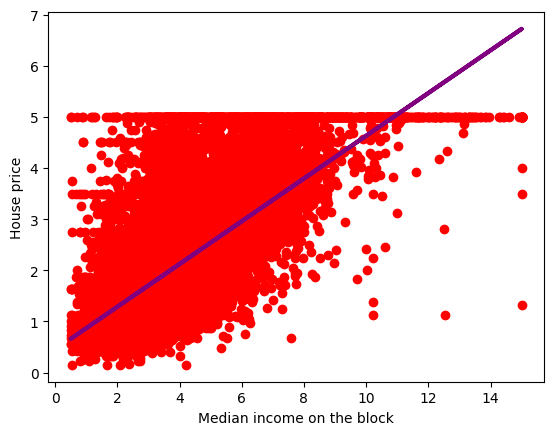

In [188]:
# define line of best fit, (y = m*x + b)
y_model = coefficient*X + intercept

# create the plot
plt.figure()
plt.scatter(X, y, color='red')  # plot the data
plt.plot(X, y_model, color='purple', linewidth=3)  # plot the line of best fit
plt.xlabel('Median income on the block')
plt.ylabel('House price')
plt.show()

Fitting any other model essentially follows the same process, once we have the data loaded into a format scikit-learn can use we:
1. Pick and instantiate a model with `my_model_instance = sklearn_model()`
2. Fit the model to the data with `my_model_instance.fit(X, y)`

#### Making Predictions and Evaluating

Once we have fit a model to the features, $X$, and target, $y$, we can test the relationship it learned between the dependent and independent variables. 

Given a set of independent variables $X'$ (which may or may not be the same as our original $X$), we can use `my_model_instance.predict(X')` to find what the model thinks the corresponding dependent variable ($y'$) is.

Let's pass in the original $X$ data to get our model's prediction for each data point:

In [189]:
model_prediction = linear_regression_model.predict(X)

If we want to visualize the model predictions and the actual values together we can plot them:

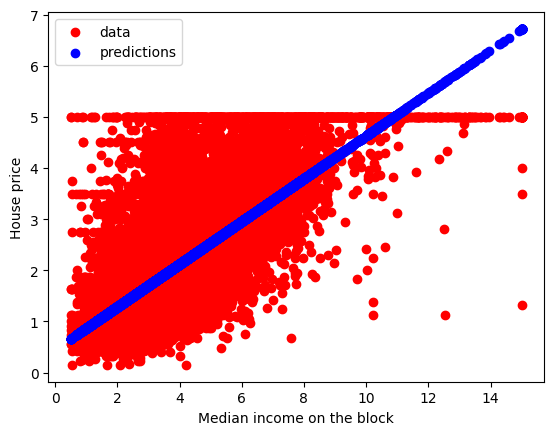

In [190]:
plt.figure()
plt.scatter(X, y, c='red', label='data') # plot original data
plt.scatter(X, model_prediction, c='blue', label='predictions') # plot predictions
plt.legend()
plt.xlabel('Median income on the block')
plt.ylabel('House price')
plt.show()

As expected, these predictions lie right on the line of best fit and they don't seem to match the data well. We can get an empirical evaluation of the model using the $R^2$, which we can calculate using the `r2_score` function from the `metrics` sub-module:

In [191]:
from sklearn.metrics import r2_score

# Evaluate the model
print(f'The R2 score: {r2_score(y, model_prediction)}')

The R2 score: 0.47344749180719903


The intuition we had from the plots turned out to be true, the model wasn't a great fit to the data.

Above we used 2 steps to get the $R^2$ score: 

- `my_model.predict()`
- `r2_score()`

To get the $R^2$ in 1 step, we can use our model's built-in scoring method: `my_model.score()`

In [192]:
# 3. Scoring the model
linear_regression_model.score(X, y)

0.47344749180719903

The `.score()` method returns different scores for different types of models — so bear this in mind depending on the type of problem you are working on and be careful in your interpretations. For regression models, `.score()` returns the $R^2$ score. For classification models, it returns the accuracy score, as we will see shortly with a logistic regression example.

#### Summary

In summary, fitting any model in `scikit-learn` consists of 3 steps: 

1. Instantiate
2. Fit 
3. Score

#### Saving a Model

Once we have a model that we are happy with, we often want to save it for future use. `scikit-learn` models may be saved as `.pkl` files, and we can create them using the `joblib.dump()` function.

All we need to do is import the function, and specify the model instance we'd like to save and filename we want to use.

In [193]:
import joblib

joblib.dump(linear_regression_model, 'my_linreg_model.pkl') 

['my_linreg_model.pkl']

We can now reload the model into a variable anytime we'd like to use it. (This can even be done in a new notebook or a different computer as long as the file is accessible.)

In [194]:
my_new_model = joblib.load('my_linreg_model.pkl') 

This model can now be used exactly as the original one was, as all the model parameters and attributes calculated during the fitting step have been saved:

In [195]:
print(my_new_model.score(X, y))

0.47344749180719903


### Example: Fitting a Logistic Regression Model

We will now look at fitting a logistic regression model with `scikit-learn`. We will be using a randomly generated data set.

In [196]:
np.random.seed(12345)
# Generating data of two classes

# Data has one feature where the first 20 data points come from one distribution
# and the other 20 come from a different distribution (to mimic two classes)
X = pd.DataFrame(np.array(np.concatenate((np.random.randn(20) + (-1), np.random.randn(20) + (+1)), axis=0)),
                 columns=['mydata'])

# The target contains 20 1's and 20 0's
y = pd.Series(np.full((40), 0))
y.loc[:20] = 1

#### Check the Shape of the Data 

Remember that we have to check the shape of the data and it has to be in the following format:
- the features matrix, $X$ must be two dimensional: `(nrows, ncols)`
- the target vector, $y$ must be one dimensional, *i.e.* a vector: `(nrows,)`

In [197]:
X.shape

(40, 1)

In [198]:
y.shape

(40,)

This is exactly what we need! We can move on to fitting a model.

Remember that we will need to complete three steps in the model fitting process: 

1. Instantiate
2. Fit
3. Score

But since this is a classification task, we will use a `LogisticRegression` model (also imported from the `linear_model` module):

In [199]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate the model
logistic_regression_model = LogisticRegression()

# 2. Fit the model
logistic_regression_model.fit(X, y)

LogisticRegression()

The `logistic_regression_model` variable now holds all of the information regarding our model. We can again pull out the coefficients if needed.

In [200]:
#The intercept
intercept = logistic_regression_model.intercept_

#The coefficient, notice it returns an array with one entry for each feature
coefficient = logistic_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.17490132]
Coefficients: [-1.14984997]


#### Making Predictions and Evaluating

We can again use `.predict()` to get the prediction the model makes for each data point it was fitted to:

In [201]:
model_prediction = logistic_regression_model.predict(X)

If we want to visualize the model predictions and the actual values together we can plot them:

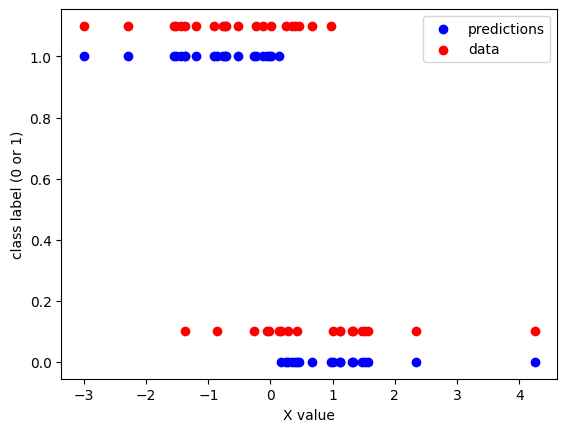

In [202]:
plt.figure()
# plot the predictions
plt.scatter(X, model_prediction, c='blue', label="predictions") 
# plot original data (with the y-values offset a tiny bit to reduce overlap)
plt.scatter(X, y+0.1, c ='red', label="data")
plt.legend()
plt.xlabel('X value')
plt.ylabel('class label (0 or 1)')
plt.show()

This prediction appears pretty good, there are some mistakes in the middle, but this is to be expected for any model of this type.


For classification tasks (categorical dependent variable) a common evaluation metric is the *accuracy score* - this is the fraction of data points for which our model correctly predicts the category. `scikit-learn` includes a function, `accuracy_score()`, which can compute this for us (there are many other classification metrics to be explored as well).

In [203]:
from sklearn.metrics import accuracy_score

accuracy_score(y, model_prediction)

0.7

This seems like a reasonable accuracy for our model and matches what we saw visually above.

Similar to the linear regression model, we used 2 steps to get the accuracy score: 

- `my_model.predict()`
- `accuracy_score()`

We can also calculate the accuracy score in 1 step using the `my_model.score()` method. Recall that the `.score()` method returns the accuracy score for a classification model.

So instead of predicting and calculating the accuracy with the predictions, we can just do:

In [204]:
# 3. Score the model
logistic_regression_model.score(X,y)

0.7

#### Predicting on Unseen Data

We can also use the `.predict()` method to make predictions on data the model was _not_ fitted to. Let's say we acquired more data from the same source (in this case, we generate more data points in the same fashion):

In [205]:
np.random.seed(12345)

# Generate 40 more points (use almost the same method)
X_new = pd.DataFrame(np.array(np.concatenate(
    (2*np.random.randn(20) + (-1), 2*np.random.randn(20) + (+1)), axis=0)))
y_new = pd.DataFrame(np.full((40), 0))
y_new.loc[:20] = 1

We will now try to predict the target for this data using the previously fit model, without refitting it on the new data.

The idea is that if the new data comes from the same source as the original, the previously fit model should make pretty good predictions, even if it hasn't seen the new data.

In [206]:
# Have the model predict the target for the new points
model_prediction_new = logistic_regression_model.predict(X_new)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


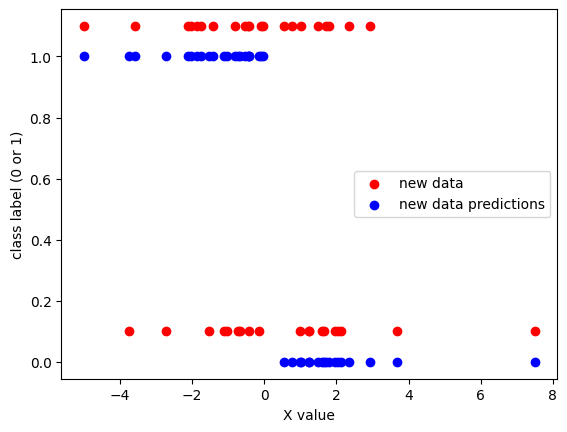

In [207]:
# plotting the new data
plt.scatter(X_new, y_new+0.1,  color='red',label="new data")
# plotting the predictions for the new data
plt.scatter(X_new, model_prediction_new, color='blue',label="new data predictions")
plt.legend()
plt.xlabel('X value')
plt.ylabel('class label (0 or 1)')
plt.show()

These predictions appear slightly less accurate. We can calculate the accuracy score of our model on the new data and compare it to the accuracy score on the original data used to fit the model.

In [208]:
print('Score on data model was fitted to')

logistic_regression_model.score(X,y)

Score on data model was fitted to


0.7

In [209]:
print('Score on data model was NOT fitted to')

logistic_regression_model.score(X_new,y_new)

Score on data model was NOT fitted to


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.575

The intuition we had from the plots turned out to be true, the model's predictions are worse for the data it had not seen before.

**The Goal in Machine Learning:**

The scores we saw above might make sense intuitively. In fact, a model's score on unseen data will nearly always be lower. 

In machine learning, though, the goal is to fit a model that will generalize well to new incoming data without actually fitting to this new data. Hence, when we evaluate a model, we will always calculate one score based on the data on which it *was* fit and another score based on the data it was *not*.

We typically want to make sure that these two scores are very close to each other. And the true test for a model's predictive power will be its score on the data it has not yet seen.

---

#### Exercise 1:

The `iris` dataset is the Hello World of machine learning and is available through `scikit-learn`.
1. Load the data in using `scikit-learn`. Explore the data set. How many rows and columns are there? Is the target continuous or categorical?
2. Of all the models we know so far, which model should be used for this data?
3. Let's artificially create a scenario where we have some data that we fit the model to and some new data on which we will evaluate the model. Write some code that will randomly split the data into two sets, a smaller one and a larger one. (*Hint*: use a list of the numbers 1 to 150 (# of data points), shuffle it, and use it to pull out the two sets of data).
4. Fit the model on the larger set of data, then calculate scores using both sets. Did the model predict well on the smaller set of data it hadn't seen?

---

### The Train/Test Split

The sets of data we created in the previous exercise are standard practice in machine learning. The two sets are called the *training set* and the *test set*.

The model of interest will be fit on the training data and will be evaluated on both the training data and test data. The reason for splitting our data into train and test sets is to ensure models do not *overfit* to the data they are trained on and can generalize to new data. 

Since this is a standard procedure in model fitting, `scikit-learn` has a built-in function `train_test_split()`. This function expects the features, target variable, and a split size argument. It divides the data into a training set, which contains a random group of the data, and a test set, which contains the remainder of the data. The split size dictates the relative size of the two sets (for a full list of features see: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Let's go back to the iris data set and use the `train_test_split` function.

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Get the data:
iris = load_iris()

In [ ]:

y = iris.target
X = iris.data

# Split the data so the test set contains 20% of the points
# (the training set will contain the rest of the points)
# random state is setting the seed for the random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [255]:
my_numbers = list(range(150)) ; my_numbers[:10]



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [256]:
import random

random.shuffle(my_numbers)

In [260]:
size_of_small = int(.2 * 150); size_of_small

30

In [263]:
smaller_set_ind = my_numbers[:size_of_small]
larger_set_ind = my_numbers[size_of_small:] ; len(smaller_set_ind)

30

In [249]:
pd.DataFrame(iris.target)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [241]:
pd.DataFrame(np.array(iris.data)).head()


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [242]:
pd.DataFrame(np.array(y.data))[0].unique()


array([0, 1, 2])

Now that we have the data split, we can fit and evaluate the model on the appropriate sets, respectively:

In [269]:
# 1. Instantiate model 
logistic_regression_model = LogisticRegression(max_iter=1000)

# 2. Fit model on the training data
logistic_regression_model.fit(X_train, y_train)

# 3. Score on the training data 
print(logistic_regression_model.score(X_train, y_train))

# 4. Score on the testing data
print(logistic_regression_model.score(X_test, y_test))

0.975
0.9666666666666667


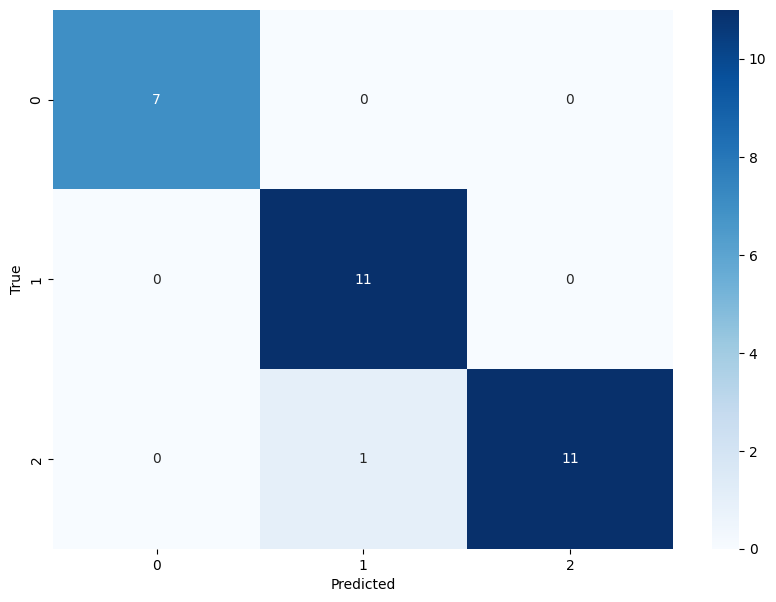

In [265]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predict the values from the test data
y_pred = logistic_regression_model.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


*Note: we can ignore the warnings here*

As we saw with the earlier examples, the accuracy is slightly higher for the data on which the model was fit.

###  Overfitting 

Overfitting is when a model goes beyond fitting to the trend in the data and starts fitting to noise. This noise _happens_ to be correlated with the target variable in our data, and so increases performance metrics, but if we were given new data about the same phenomenon, our model would no longer perform so well.

<img src = "https://drive.google.com/uc?export=view&id=1I0h7hk2qBel8NvykkeYAJh6eIGiwEycg" width = 800 >

We can detect overfitting by comparing performance scores on the training set and the test set. 
- If the training score and test score are both low, that's a sign of _underfitting_. The model hasn't picked up the relationship between the features and target. 
- If the training score and test score are both high, that's a sign of a good fit. The model has picked up the relationship between the features and target.
- If the training score is much higher than the test score, that's a sign of _overfitting_. The model has fit to noise in the training set, missing out on the underlying relationship between the features and target.

One of the main reasons for withholding a test set is for it to act as an unbiased sample and measure of model performance. It allows us to evaluate whether our model has picked up the general trend in the training data or whether it has been overfit to random noise in the particular data on which we happened to train it.

In the iris dataset example earlier, the performance was pretty similar between the train and test sets, so it doesn't seem like overfitting is a problem there.

---
#### Exercise 2

1. Load the breast cancer data set from `scikit-learn` using the code below. Each row in this dataset is a tumor found in a patient and the columns contain different measurements thereof. The goal is to model whether the tumor is benign or malignant based on its measurements. Fit a logistic regression model using 25% of the data in the test set and evaluate the performance on both sets of data. Repeat this with a test set size of 75%. Do you see any pattern in the results? 

In [311]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load in the breast cancer data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# NOTE: Here we add some random noise to the X data to make this
# a more difficult classification problem
random_state = np.random.RandomState(10)
n_samples, n_features = X.shape
X = X + (random_state.randn(n_samples, n_features) * 10)

# Your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)



# 1. Instantiate model 
logistic_regression_model = LogisticRegression(max_iter=1000)

# 2. Fit model on the training data
logistic_regression_model.fit(X_train, y_train)

# 3. Score on the training data 
print(f'Training Acurracy: {logistic_regression_model.score(X_train, y_train)}')

# 4. Score on the testing data
print(f'Testing Acurracy: {logistic_regression_model.score(X_test, y_test)}')

Training Acurracy: 0.9582417582417583
Testing Acurracy: 0.8947368421052632


2. Imagine we had just run many different model fits on a dataset, each with a different proportion of data in the training set. Our results are below. Run the script to plot the training and test set scores across different split sizes. How do you explain what is going on in the graph? Is there any pattern? 

_Note: While this is an interesting exercise, optimizing test scores based upon the size of the split is not something that should be done in practice. The goal of using a test set is to have an unbiased measure of how well our models would do on new, unseen data. So normally we will decide on a train/test split at the beginning and stick with it throughout our entire analysis._

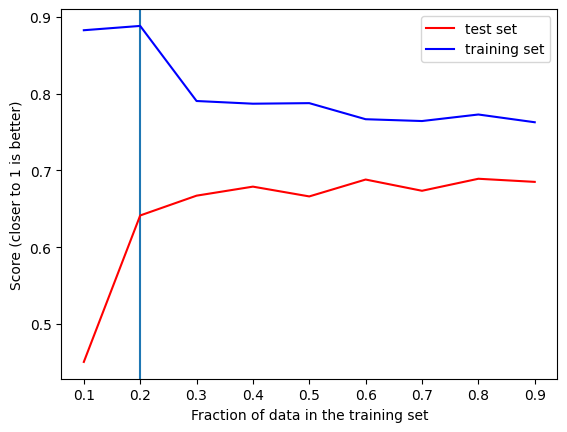

In [312]:
'''
Plot train/test split
'''

# lists of training and test accuracies/scores
train_scores = [0.88284688, 0.88846094, 0.79057243, 0.78705259,\
                0.78778089, 0.76681602, 0.76445634, 0.77297187, 0.76286908]
test_scores = [0.45039566, 0.64134249, 0.66715683, 0.67892978,\
            0.66617014, 0.68817849, 0.67352809, 0.68920115, 0.68513161]

split_range = np.arange(.1,1,.1) 

plt.axvline(.2)
plt.plot(split_range, test_scores,  color='red',label="test set")
plt.plot(split_range, train_scores, color='blue',label="training set")
plt.ylabel('Score (closer to 1 is better)')
plt.xlabel('Fraction of data in the training set')
plt.legend()
plt.show()

---

### Regularization

What would be our next step if our model was overfitting to the training data? With linear and logistic regression models, we have the option of using *regularization*.

Broadly speaking, regularization refers to altering the optimization problem so that we arrive at different model parameters. When a model is trained, the coefficients are calculated based on the data given to it. Hence, these parameters control both the fit and behavior of the model. 

Ideally, we want to have a way to adjust how the model parameters are calculated to control how the model learns based on the training data.

#### Penalty for the Cost Function
For both linear and logistic regression, to calculate the model parameters (coefficients), we need to solve some optimization problem, *i.e.* optimize against a cost function. For the linear models we have seen thus far, these cost functions are based upon the following:

- Linear regression: Minimize the sum of squared residuals (SSR) to find the coefficients
- Logistic regression: Maximize the likelihood to find the coefficients 

To apply regularization means to alter what we are trying to optimize to hopefully end up at better model parameters and hence models which generalize better to unseen data.

To achieve this in linear regression, we add in a 'penalty' term to the SSR to penalize large model coefficients. We then try to minimize the SSR plus this penalty and this becomes our new optimization problem. 

To achieve this in logistic regression, we add in a 'penalty' term to the likelihood. We then try to minimize the likelihood plus this penalty and this becomes our new optimization problem. 

#### L1 and L2 Penalties

If our goal is to shrink extreme coefficient values, there are two penalties that we can add. 

The first is the $L2$ penalty:

$$P(\beta) = \alpha \sum_i \beta_i ^2$$

$$Cost = SSR + \alpha \sum_i \beta_i ^2$$

Using the $L2$ penalty is also called *Ridge Regression*. 

We can also use the $L1$ penalty:

$$P(\beta) = \alpha \sum_i |\beta_i|$$

$$Cost = SSR + \alpha \sum_i |\beta_i|$$

Using this penalty is called *Lasso Regression*.

The $\alpha$ term is the weight of the regularization. The higher it is, the more the penalty term affects the calculation of the parameters. Whatever regression we pick, the model is now biased to select smaller coefficients - the $\beta$ terms - as when these become large, greater penalties will be applied. Since the underlying optimization goal has been changed, the trained model will likely be different, usually returning a different solution for its parameters.

#### Comparison of L1 and L2
Now that we have a basic understanding of what regularization is and how it is applied to Linear and Logistic Regression, let's compare the $L1$ and $L2$ penalties in more detail. We will start by plotting the underlying functions of both L1 and L2, the absolute value function and the square function:

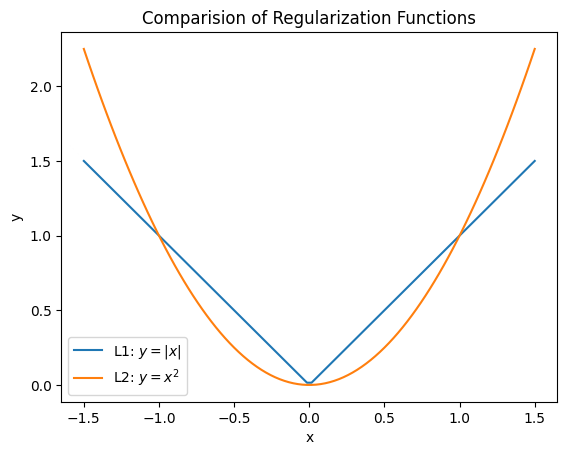

In [ ]:
# Data points for creating the lines in our visual.
x = np.linspace(-1.5, 1.5, 100)

# Plot x^2 and abs(x) on the same visual
plt.plot()
plt.plot(x, np.abs(x), label="L1: $y = |x|$")
plt.plot(x, np.power(x, 2), label="L2: $y = x^2$")
plt.title("Comparision of Regularization Functions")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

There are a few similarities and differences between these two functions that are of interest to us:
1. $L2$ regularization provides much greater penalties than $L1$ for large coefficients, but a smaller penalty for coefficients close to 0.
2. Both $L1$ and $L2$ have the smallest penalties at 0, this encourages the coefficients to become smaller, or even shrink them to 0. In fact, with the $L1$ penalty (Lasso), the parameters can be brought directly to 0 while with the $L2$ penalty (Ridge) they can get close to 0 but never be exactly 0.

#### Regularization and Multicollinearity
In addition to overfitting, regularization tends to help with the issue of multicollinearity, as it reduces the effect of many of the features included in the model. $L1$ regularization is often thought of as an automatic way of performing feature selection as it can potentially force some of the coefficients to 0.

#### Regularization With `scikit-learn`
Now that we have an understanding of how regularization works, let's implement it in `scikit-learn`. 

#### Logistic Regression
We can set the regularization type with the `penalty` parameter and the inverse of the weight with the `C` parameter (in our above equation $\alpha = 1/C$). 

    1. penalty: The type of regularization method used (defaults to L2)
    2. C: The inverse of the regularization strength (lower values mean a stronger regularization term)
    
In `scikit-learn`, when fitting a logistic regression model, the default settings apply $L2$ regularization with a weight ($\alpha$ or $C$) of $1$. If you would like to turn it off, you need to set `penalty='none'` when initializing the model.

#### Linear Regression
For linear regression, in order to fit a model with regularization, we use the `linear_model.Ridge()` or `linear_model.Lasso()` and control the strength of the penalty ($\alpha$) by the `alpha` parameter. 

For more detail see the official documentation on these model types: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

#### Example of the Effects of Regularization Using `scikit-learn`
We now know what regularization does and how to apply it using `scikit-learn`. Let's explore the effect of regularization on a toy example to better solidify our understanding and motivation for its use.

In [ ]:
# Create a simple train set
X_train = np.array([1.0, 1.1, 1.3, 1.5, 1.6, 1.8, 2.0]).reshape(-1,1)
y_train = np.array([1.0, 2.1, 2.1, 2.0, 3.0, 2.6, 3.5])

# Create a simple test set
X_test = np.array([1.3, 1.6, 1.8, 2.6, 3.5, 4.0]).reshape(-1,1)
y_test = np.array([1.4, 2.6, 3.1, 3.2, 4.6, 5.2])

We will start by fitting two linear regression models on the training data set. One without regularization and the other using $L2$ regularization (Ridge Regression).

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

Fortunately, this is a very simple regression with just a single feature, so we can easily visualize the result by looking at the line of best fit overlayed on our data.

In [ ]:
# Data points for creating the line in our visual.
x = np.linspace(1,2,10).reshape(-1,1)

# Calculate the value of the points along the line of best fit.
y_none = lin_reg.predict(x)
y_ridge = ridge_reg.predict(x)

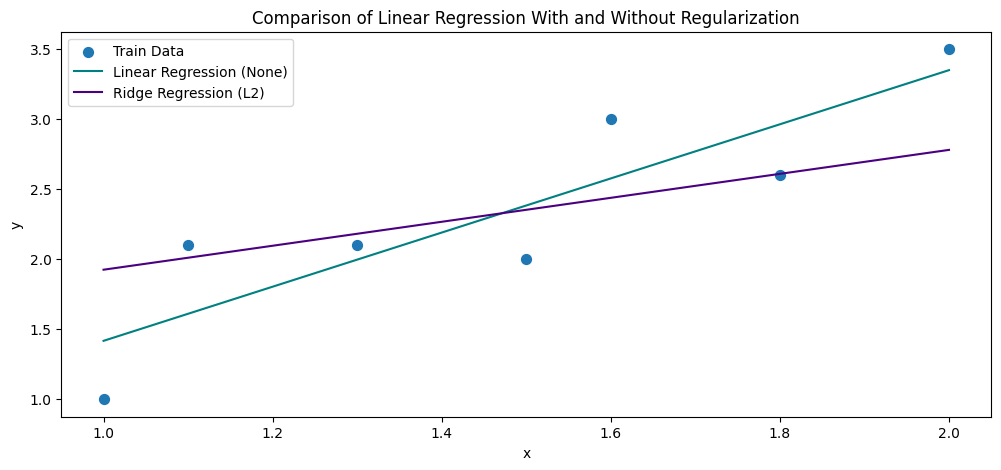

In [ ]:
# Create a visual of the two lines of best fit with only the train data.
plt.figure(figsize=(12,5))
plt.scatter(X_train, y_train, label="Train Data", s=50)
plt.plot(x,y_none, label="Linear Regression (None)", color="teal")
plt.plot(x,y_ridge, label="Ridge Regression (L2)", color="indigo")
plt.title("Comparison of Linear Regression With and Without Regularization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
print(f"R^2 of the Linear Regression (None) for train data: {lin_reg.score(X_train, y_train)}")
print(f"R^2 of the Ridge Regression (L2) for train data: {ridge_reg.score(X_train, y_train)}")

R^2 of the Linear Regression (None) for train data: 0.7663946276607032
R^2 of the Ridge Regression (L2) for train data: 0.5283440427271459


It looks like $L2$ regularization has made the slope of the best fit line less steep. This is exactly what we would expect as the slope of the best fit line is the coefficient of our model and regularization encourages our coefficients to be smaller.

Based on this result, it looks like linear regression without regularization does a better job of fitting to our data. This is confirmed when we look at the $R^2$ scores as well. But remember, so far we are only looking at the training data. Let's create the same visual, but this time include the test data as well. 

In [ ]:
# Data points for creating the line in our visual.
x = np.linspace(1,4,10).reshape(-1,1)

# Calculate the value of the points along the line of best fit.
y_none = lin_reg.predict(x)
y_ridge = ridge_reg.predict(x)

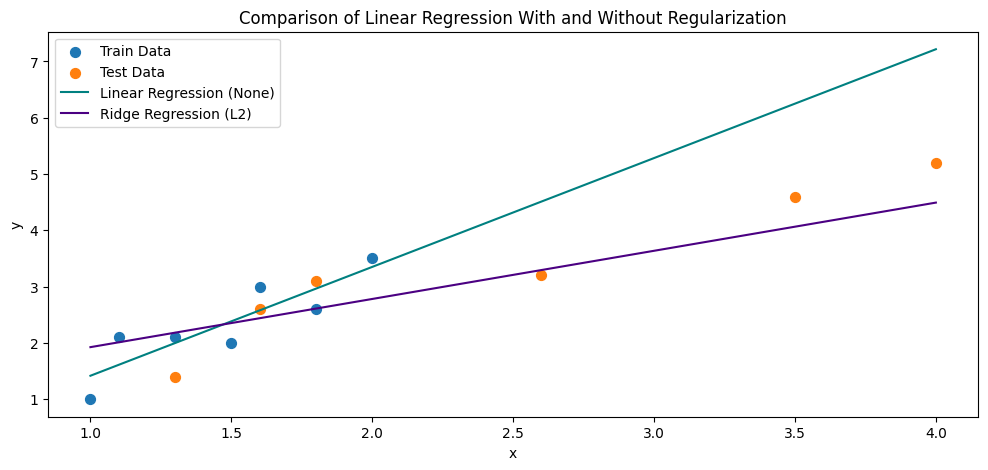

In [ ]:
# Create a visual of the two lines of best fit with the train and test data.
plt.figure(figsize=(12,5))
plt.scatter(X_train, y_train, label="Train Data", s=50)
plt.scatter(X_test, y_test, label="Test Data", s=50)
plt.plot(x,y_none, label="Linear Regression (None)", color="teal")
plt.plot(x,y_ridge, label="Ridge Regression (L2)", color="indigo")
plt.title("Comparison of Linear Regression With and Without Regularization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
print(f"R^2 of the Linear Regression (None) for test data: {lin_reg.score(X_test, y_test)}")
print(f"R^2 of the Ridge Regression (L2) for test data: {ridge_reg.score(X_test, y_test)}")

R^2 of the Linear Regression (None) for test data: 0.05794598917290794
R^2 of the Ridge Regression (L2) for test data: 0.8226613847072138


When we include our test data we can see that the Ridge Regression ($L2$) is the better fit for our data. One of the features of this test set is that it has values beyond the range of our training data. If we were to trust the model with no regularization we would have overestimated these values, instead, regularization tells our model to not put as much trust in these trends. With many real datasets, some level of regularization tends to improve the performance of our models.

---
#### Exercise 3
Using the iris data, let's try a few combinations of the `penalty` and `C` values to see if we can get closer accuracy values on the training and test data. 

Remember, the default settings are `penalty = 'l2', C=1`.

Try: 
- `penalty = 'l2', C=0.1`
- `penalty = 'l1', C=1, solver='liblinear'`
- `penalty = 'l1', C=0.01, solver='liblinear'`

Using all of these combinations and any others you tried, which model has the least overfitting (*i.e.* the closest accuracies on train and test set)?

**Note on Solvers:** _Behind the scenes Logistic Regression uses a specific algorithm, called a solver, to determine the best coefficients of the model. There are many different solvers that we can employ depending on the characteristics of our data. Some of the solvers only support certain regularization methods, hence why we have provided alternative solvers for L1 regularization._

---

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
   
# Get the data:
iris = load_iris()

y = iris.target
X = iris.data

# Split the data so the test set contains 20% of the samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>